In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_dir = "C:\\Users\\dongh\\Downloads\\MBD project\\"

In [4]:
listc = ["Time","Alberta","British Columbia","Manitoba","Nova Scotia","Ontario","Quebec"]
lista = ["California","Colorado","Florida","Georgia","Hawaii","Illinois","Massachusetts"
         ,"Michigan","North Carolina","New Jersey","Nevada","New York","Texas","Virginia","Washington"]

In [5]:
us = pd.read_csv(data_dir + "US-bystate.csv")
us.columns.values[0] = "Index"
us = us.set_index("Index")
us = us.transpose()
us = us.reset_index()
Others = pd.read_csv(data_dir + "Others.csv")
impact = pd.read_csv(data_dir + "irport_traffic.csv")
canada = Others.loc[:,listc]

In [6]:
list = us.columns.values
list[0] = "Time"
us.columns = list
us.head()

,Time,New York,California,Florida,Hawaii,Nevada,Massachusetts,Texas,Illinois,New Jersey,Washington,Georgia,Virginia,Colorado,North Carolina,Michigan
0,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/26/2020,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/27/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
canada.head()

,Time,Alberta,British Columbia,Manitoba,Nova Scotia,Ontario,Quebec
0,1/23/2020,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0
3,1/26/2020,0,0,0,0,1,0
4,1/27/2020,0,0,0,0,0,0


In [8]:
impact.head()

,Date,PercentOfBaseline,State
0,3/16/2020,92,New South Wales
1,3/16/2020,96,Santiago Province
2,3/16/2020,100,Alberta
3,3/16/2020,63,Alberta
4,3/16/2020,100,British Columbia


In [9]:
cali_inf = canada.loc[:,["Time","Nova Scotia"]]
cali_inf = cali_inf.reset_index()
cali_inf = cali_inf.drop("index",axis=1)
cali_inf.head()

,Time,Nova Scotia
0,1/23/2020,0
1,1/24/2020,0
2,1/25/2020,0
3,1/26/2020,0
4,1/27/2020,0


In [10]:
cali_imp = impact.loc[impact.State == "Nova Scotia",:]
cali_imp = cali_imp.reset_index()
cali_imp = cali_imp.drop("index",axis=1)
cali_imp.head()

,Date,PercentOfBaseline,State
0,3/16/2020,72,Nova Scotia
1,3/17/2020,56,Nova Scotia
2,3/18/2020,47,Nova Scotia
3,3/19/2020,38,Nova Scotia
4,3/20/2020,42,Nova Scotia


In [11]:
index1 = cali_inf["Time"].values.tolist()
index1 = index1.index("3/16/2020")
index2 = cali_inf["Time"].values.tolist()
index2 = index2.index("10/17/2020")
cali_inf = cali_inf.iloc[index1:index2,:]
cali_inf.shape

(215, 2)

In [12]:
cali_imp = cali_imp.drop("State",axis=1)
cali_imp.head()

,Date,PercentOfBaseline
0,3/16/2020,72
1,3/17/2020,56
2,3/18/2020,47
3,3/19/2020,38
4,3/20/2020,42


In [13]:
cali_imp = cali_imp.groupby("Date").mean()
cali_imp = cali_imp.reset_index()
cali_imp

,Date,PercentOfBaseline
0,10/1/2020,64
1,10/10/2020,100
2,10/11/2020,100
3,10/12/2020,17
4,10/13/2020,60
...,...,...
200,9/4/2020,50
201,9/5/2020,27
202,9/7/2020,12
203,9/8/2020,48


In [15]:
cali_inf.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\nova_inf.csv", index=False, header=True)
cali_imp.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\nova_imp.csv", index=False, header=True)

In [124]:
cali = pd.read_csv(data_dir + "nova.csv")
cali.head()

,Time,Nova Scotia,PercentOfBaseline
0,3/16/2020,5,72
1,3/17/2020,2,56
2,3/18/2020,5,47
3,3/19/2020,2,38
4,3/20/2020,1,42


In [125]:
N = 5
cali = cali.groupby(cali.index // N).mean()

In [126]:
cali = cali.reset_index()
cali["change"] = 0
for i in range(len(cali)):
    if i == 0:
        continue
    else:
        cali.iloc[i,3] = (cali.iloc[i,1] - cali.iloc[i-1,1])/cali.iloc[i-1,1]

C:\Users\dongh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Users\dongh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [127]:
cali = cali.dropna()

In [128]:
cali

,index,Nova Scotia,PercentOfBaseline,change
0,0,3.0,51.0,0.000000
1,1,10.6,41.0,2.533333
2,2,11.8,45.6,0.113208
3,3,21.8,37.6,0.847458
4,4,21.8,32.0,0.000000
5,5,35.0,32.8,0.605505
6,6,35.0,32.6,0.000000
7,7,17.0,31.8,-0.514286
8,8,10.0,29.8,-0.411765
9,9,5.2,46.6,-0.480000


In [129]:
cali = cali.iloc[1:,:]
cali.head()
cali.loc[cali.PercentOfBaseline.isna(),:]
#cali.loc[cali.PercentOfBaseline==0,:]

,index,Nova Scotia,PercentOfBaseline,change


In [130]:
N = 2
tmp1 = pd.DataFrame(cali.PercentOfBaseline[:20])
tmp1["change"] = cali.iloc[(N):(20+N),3].tolist()

In [131]:
cali = tmp1[:]
cali.head()
cali

,PercentOfBaseline,change
1,41.0,0.847458
2,45.6,0.000000
3,37.6,0.605505
4,32.0,0.000000
5,32.8,-0.514286
6,32.6,-0.411765
7,31.8,-0.480000
8,29.8,-0.423077
9,46.6,0.200000
10,54.0,-0.666667


In [132]:
cali.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\nova2.csv", index=False, header=True)

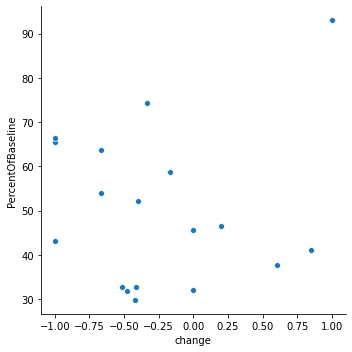

In [133]:
sns.relplot("change","PercentOfBaseline",data = tmp1)

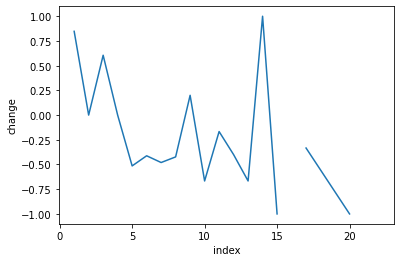

In [134]:
cali = cali.reset_index()
sns.lineplot("index","change",data = cali)

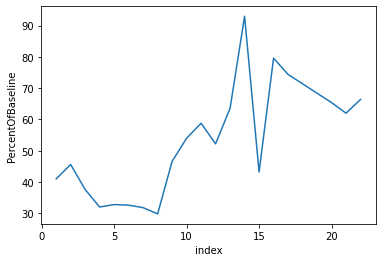

In [135]:
sns.lineplot("index","PercentOfBaseline",data = cali)

In [136]:
from statsmodels.api import OLS
OLS(cali.change,cali.PercentOfBaseline).fit().summary()

C:\Users\dongh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1602: RuntimeWarning: invalid value encountered in subtract
  self.params, self.model.wexog)
C:\Users\dongh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\dongh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1617: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,
C:\Users\dongh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:883: RuntimeWarning: invalid value encountered in subtract
  resid = self.endog - np.dot(self.exog, params)
C:\Users\dongh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1273: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 change   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                         nan
Time:                        02:06:16   Log-Likelihood:                             nan
No. Observations:                  20   AIC:                                        nan
Df Residuals:                      19   BIC:                                        nan
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PercentOfBaseline        inf        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""